In [8]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df = df.dropna(subset=['Cuisines', 'Votes', 'Aggregate rating'])
df['Votes'] = df['Votes'].astype(int)
df['Aggregate rating'] = df['Aggregate rating'].astype(float)

In [ ]:
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

print("Top 10 Highest Rated Cuisines:")
print(avg_rating_by_cuisine.head(10))

Top 10 Highest Rated Cuisines:
Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


In [ ]:
votes_by_cuisine = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

print("Top 10 Most Voted Cuisines:")
print(votes_by_cuisine.head(10))

Top 10 Most Voted Cuisines:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


/tmp/ipython-input-6-4070353055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisines', y='Aggregate rating', data=top_df, palette='Set2')


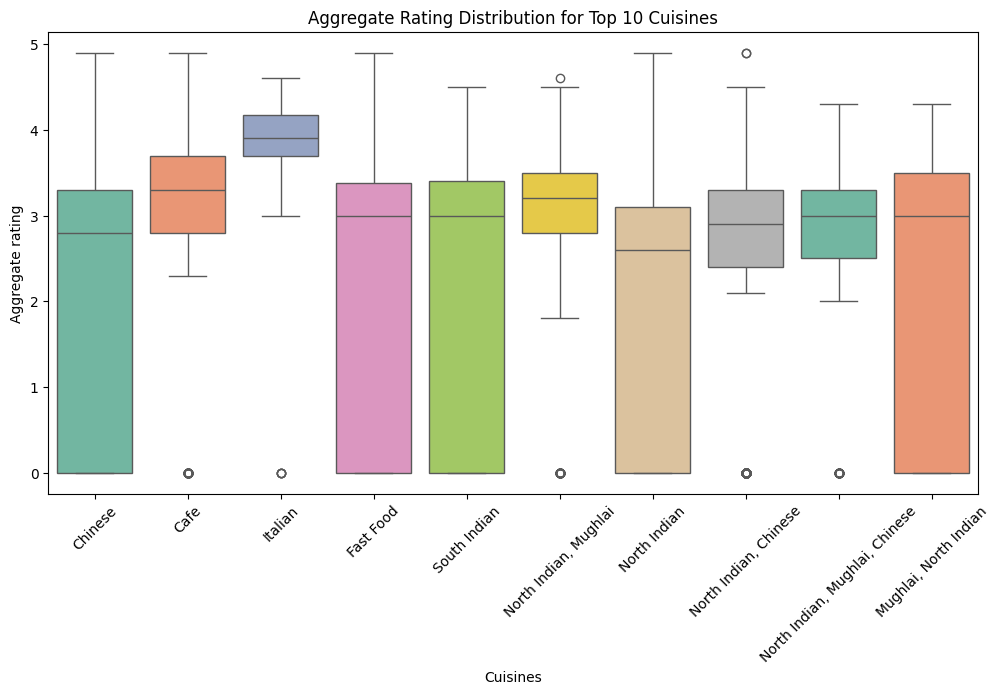

In [ ]:
top_cuisines = votes_by_cuisine.head(10).index

top_df = df[df['Cuisines'].isin(top_cuisines)]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=top_df, palette='Set2')
plt.title("Aggregate Rating Distribution for Top 10 Cuisines")
plt.xticks(rotation=45)
plt.show()

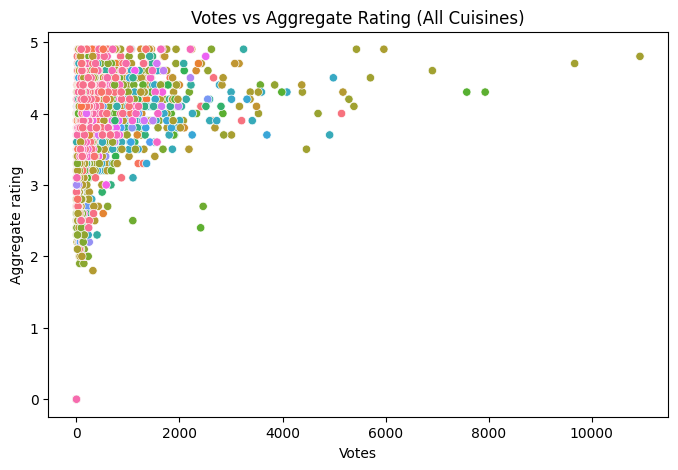

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', hue='Cuisines', legend=False)
plt.title("Votes vs Aggregate Rating (All Cuisines)")
plt.show()